<a href="https://colab.research.google.com/github/Salciano/Python/blob/main/17_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
#from IPython import display
#display.set_matplotlib_formats("svg")
#matplotlib_inline.backend_inline.set_matplotlib_formats("svg")




In [ ]:
nperclust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [ A[0] + np.random.randn(nperclust)*blur, A[1] + np.random.randn(nperclust)*blur ]
b = [ B[0] + np.random.randn(nperclust)*blur, B[1] + np.random.randn(nperclust)*blur ]

#labels = np.array([np.zeros(nperclust), np.ones(nperclust)])

#print("nostack")
#print(labels)

#print("\nvstack")
#labels = np.vstack((np.zeros((nperclust)), np.ones((nperclust))))

#print(labels)
#print(type(labels))

#print("\nvstack,1")
labels_np = np.vstack((np.zeros((nperclust, 1)), np.ones((nperclust, 1))))
#print(labels)
#print(labels.shape)

#labels = np.concatenate((np.zeros(100),np.ones(100))).reshape(-1,1)
#print(labels)
#print(labels.shape)

data_np = np.hstack((a,b)).T
#print(data_np.shape)
#data_np = np.vstack((a,b))
#print(data_np.shape)

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()








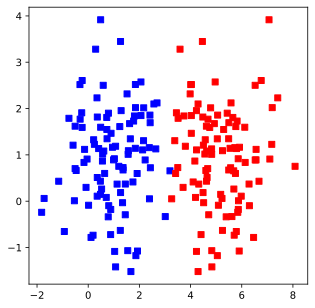

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==1)[0], 1], "bs")
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], "rs")


plt.show()






In [ ]:
def creatannmodel(learningrate):
  annclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1)
    #nn.Sigmoid() # uneeded due to BCEWithLogitsLoss
  )
  lossfun = nn.BCEWithLogitsLoss()

  optimizer = torch.optim.SGD(annclassify.parameters(), lr=learningrate)

  return annclassify, lossfun, optimizer


